In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("C:/Users/SCIENCE/time3.csv", index_col="Order Date", parse_dates=True)
df

,Units Sold,Total Revenue
Order Date,,
2015-08-31,3604,2408445.08
2010-11-20,8435,2153286.80
2017-06-22,4848,2045322.72
2012-02-28,7225,3048155.25
2010-08-12,1975,406257.50
...,...,...
2010-11-16,39,363.87
2013-12-14,8856,1351248.48
2010-02-18,261,2435.13


In [32]:
import itertools
import warnings
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_percentage_error

<Axes: xlabel='Order Date'>

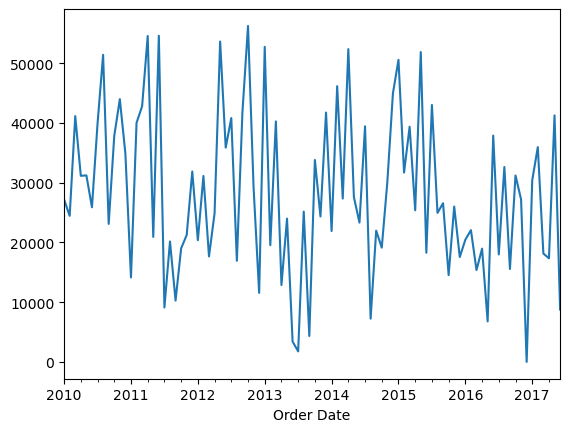

In [33]:
ts=df["Units Sold"].resample("M").sum()
ts.plot()

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(ts)
# Extract results
adf_statistic = adf_test[0]  # Test statistic
p_value = adf_test[1]         # p-value
critical_values = adf_test[4] # Critical values at 1%, 5%, and 10% levels

# Print results
print("ADF Test Results:")
print(f"Test Statistic: {adf_statistic:.4f}")
print(f"P-Value: {p_value:.4f}")
print("Critical Values:")
for key, value in critical_values.items():
    print(f"   {key}%: {value:.4f}")



ADF Test Results:
Test Statistic: -4.7936
P-Value: 0.0001
Critical Values:
   1%%: -3.5069
   5%%: -2.8950
   10%%: -2.5846


<function matplotlib.pyplot.show(close=None, block=None)>

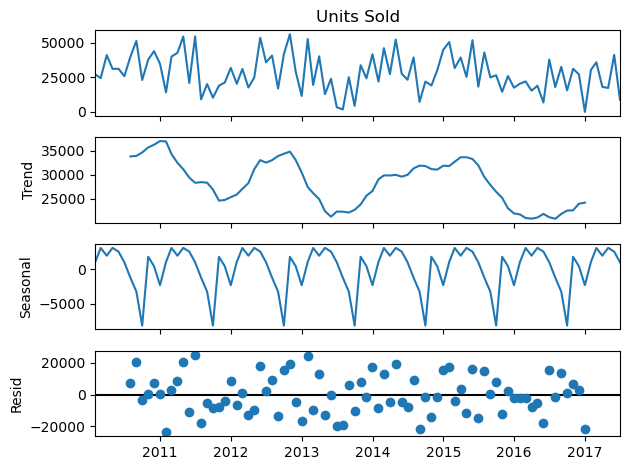

In [35]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(ts)
fig = decomposition.plot()
plt.show

Order Date
2016-09-30    15556
2016-10-31    31198
2016-11-30    27197
2016-12-31        0
2017-01-31    30400
2017-02-28    35949
2017-03-31    18137
2017-04-30    17337
2017-05-31    41260
2017-06-30     8762
Freq: M, Name: Units Sold, dtype: int64
Order Date
2010-01-31    27177
2010-02-28    24441
2010-03-31    41143
2010-04-30    31147
2010-05-31    31216
              ...  
2016-04-30    18955
2016-05-31     6777
2016-06-30    37882
2016-07-31    17993
2016-08-31    32619
Freq: M, Name: Units Sold, Length: 80, dtype: int64
<bound method NDFrame.tail of Order Date
2010-01-31    27177
2010-02-28    24441
2010-03-31    41143
2010-04-30    31147
2010-05-31    31216
              ...  
2017-02-28    35949
2017-03-31    18137
2017-04-30    17337
2017-05-31    41260
2017-06-30     8762
Freq: M, Name: Units Sold, Length: 90, dtype: int64>


<Axes: xlabel='Order Date'>

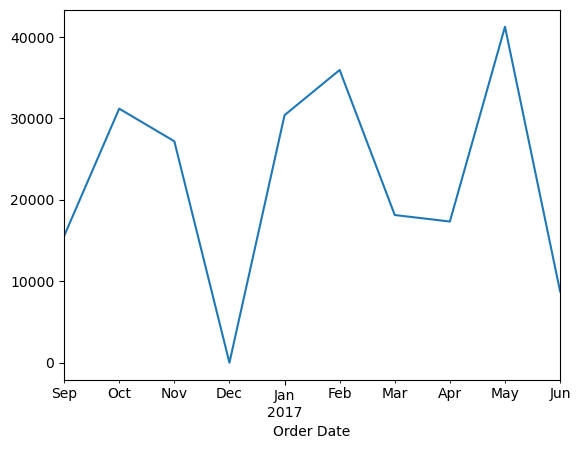

In [36]:
train=ts[:80]
test=ts[80:]
print(test)
print(train)
print(ts.tail)
test.plot()

In [37]:
alphas = betas = gammas = np.arange(0.10, 1, 0.20)
alphas

array([0.1, 0.3, 0.5, 0.7, 0.9])

In [38]:
print("Alphas: {}\nBetas: {}\nGammas: {}".format(alphas, betas, gammas))

Alphas: [0.1 0.3 0.5 0.7 0.9]
Betas: [0.1 0.3 0.5 0.7 0.9]
Gammas: [0.1 0.3 0.5 0.7 0.9]


In [39]:
tes_model = ExponentialSmoothing(ts, seasonal_periods=12).fit(smoothing_level=0.4)


In [40]:
start_date = test.index[0]  # Get the fir

end_date = test.index[-1]   # Get the last date in the test set

# Pass the start and end dates as string or datetime
pred = tes_model.predict(start=start_date, end=end_date)
pred

Order Date
2016-09-30    25873.205718
2016-10-31    21746.323431
2016-11-30    25526.994059
2016-12-31    26194.996435
2017-01-31    15716.997861
2017-02-28    21590.198717
2017-03-31    27333.719230
2017-04-30    23655.031538
2017-05-31    21127.818923
2017-06-30    29180.691354
Freq: M, dtype: float64

In [41]:
start_date = test.index[-1]  # The last date in the test set
end_date = start_date + pd.DateOffset(months=10)  # Forecast 12 months ahead

pred = tes_model.forecast(steps=10) 
pred

2017-07-31    21013.214812
2017-08-31    21013.214812
2017-09-30    21013.214812
2017-10-31    21013.214812
2017-11-30    21013.214812
2017-12-31    21013.214812
2018-01-31    21013.214812
2018-02-28    21013.214812
2018-03-31    21013.214812
2018-04-30    21013.214812
Freq: M, dtype: float64

In [42]:
test.index = pd.date_range(start=test.index[0], periods=len(test), freq='M')
test.index

DatetimeIndex(['2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31',
               '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30'],
              dtype='datetime64[ns]', freq='M')

In [43]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

best_score = float("inf")
best_params = None

# Define range of parameters to test
alpha_values = [0.1, 0.3, 0.5, 0.7, 0.9]
beta_values = [0.1, 0.3, 0.5, 0.7, 0.9]
gamma_values = [0.1, 0.3, 0.5, 0.7, 0.9]

for alpha in alpha_values:
    for beta in beta_values:
        for gamma in gamma_values:
            try:
                # Reinitialize model for each parameter set
                model = ExponentialSmoothing(
                    train,  # Replace with your actual dataset
                    trend="add",
                    seasonal="add",
                    seasonal_periods=12,  # Adjust as needed
                    use_boxcox=False  # Ensure consistency
                )
                
                fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
                score = fitted_model.aic  # Use AIC to evaluate performance

                if score < best_score:
                    best_score = score
                    best_params = (alpha, beta, gamma)

                print(f"Success: α={alpha}, β={beta}, γ={gamma}, AIC={score}")

            except Exception as e:
                print(f"⚠️ Failed at α={alpha}, β={beta}, γ={gamma}: {e}")

print(f"\nBest Parameters: α={best_params[0]}, β={best_params[1]}, γ={best_params[2]}, Best AIC={best_score}")

from sklearn.metrics import mean_absolute_percentage_error
tes_model = ExponentialSmoothing(train,
                                 trend="add", # add || mul
                                 seasonal="add", # add || mul
                                 seasonal_periods=12 # we set 12. It represents that 12 step (month for our case) equals a seasonal period
                                 ).fit(smoothing_level=0.2, # alpha
                                       smoothing_trend=0.2, # beta
                                       smoothing_seasonal=0.5
                                        )
test.index = pd.date_range(start=test.index[0], periods=len(test), freq='M')
pred1 = tes_model.forecast(steps=10)
actual   = test 
forecast = pred1
  
# Consider a list APE to store the 
# APE value for each of the records in dataset 
APE = [] 
import numpy as np

for day in range(len(actual)):
    if actual.iloc[day] == 0:
        per_err = 0  # Handle zero actual values properly
    else:
        per_err = (actual.iloc[day] - forecast.iloc[day]) / actual.iloc[day]
# Iterate over the list values 

  
    # Take absolute value of 
    # the percentage error (APE) 
    per_err = abs(per_err) 
  
    # Append it to the APE list 
    APE.append(per_err) 
  
# Calculate the MAPE 
MAPE = sum(APE)/len(APE) 
  
# Print the MAPE value and percentage 
print(f''' 
MAPE   : { round(MAPE, 2) } 
MAPE % : { round(MAPE*100, 2) } % 
''')
print(test.index)

C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)


Success: α=0.1, β=0.1, γ=0.1, AIC=1566.6425924591967
Success: α=0.1, β=0.1, γ=0.3, AIC=1581.8631974278433


C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)


Success: α=0.1, β=0.1, γ=0.5, AIC=1597.0663790676704
Success: α=0.1, β=0.1, γ=0.7, AIC=1613.285002174716


C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)


Success: α=0.1, β=0.1, γ=0.9, AIC=1631.0860105954166


C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)


Success: α=0.1, β=0.3, γ=0.1, AIC=1579.530903205105


C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)


Success: α=0.1, β=0.3, γ=0.3, AIC=1596.1483236954232


C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)


Success: α=0.1, β=0.3, γ=0.5, AIC=1612.9008594023999


C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)


Success: α=0.1, β=0.3, γ=0.7, AIC=1631.4300376464976


C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)


Success: α=0.1, β=0.3, γ=0.9, AIC=1652.175604392149


C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)


Success: α=0.1, β=0.5, γ=0.1, AIC=1594.0859582895646


C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)


Success: α=0.1, β=0.5, γ=0.3, AIC=1611.7117415657578


C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
C:\Users\SCIENCE\Desktop\anaco\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)


Success: α=0.1, β=0.5, γ=0.5, AIC=1631.705779098376
Success: α=0.1, β=0.5, γ=0.7, AIC=1654.8466345133722


C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)


Success: α=0.1, β=0.5, γ=0.9, AIC=1671.7811269658305


C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)


Success: α=0.1, β=0.7, γ=0.1, AIC=1603.5542068789912
Success: α=0.1, β=0.7, γ=0.3, AIC=1626.6691728654214


C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)


Success: α=0.1, β=0.7, γ=0.5, AIC=1654.035173349166


C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
C:\Users\SCIENCE\Desktop\anaco\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)


Success: α=0.1, β=0.7, γ=0.7, AIC=1669.879935450079
Success: α=0.1, β=0.7, γ=0.9, AIC=1663.4865368222584


C:\Users\SCIENCE\Desktop\anaco\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)


Success: α=0.1, β=0.9, γ=0.1, AIC=1614.405673165965
Success: α=0.1, β=0.9, γ=0.3, AIC=1646.364385215983
Success: α=0.1, β=0.9, γ=0.5, AIC=1669.8076554515326
Success: α=0.1, β=0.9, γ=0.7, AIC=1659.8139526092045


C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)


Success: α=0.1, β=0.9, γ=0.9, AIC=1647.7562999197685
Success: α=0.3, β=0.1, γ=0.1, AIC=1571.3502368575691


C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)


Success: α=0.3, β=0.1, γ=0.3, AIC=1587.8927412123624


C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)


Success: α=0.3, β=0.1, γ=0.5, AIC=1605.283880011857


C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)


Success: α=0.3, β=0.1, γ=0.7, AIC=1624.7603450274662
Success: α=0.3, β=0.1, γ=0.9, AIC=1646.7821734229692


C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)


Success: α=0.3, β=0.3, γ=0.1, AIC=1579.515765369772
Success: α=0.3, β=0.3, γ=0.3, AIC=1597.0878178395837


C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)


Success: α=0.3, β=0.3, γ=0.5, AIC=1615.1293914855341
Success: α=0.3, β=0.3, γ=0.7, AIC=1633.2684034342255


C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)


Success: α=0.3, β=0.3, γ=0.9, AIC=1652.2575680896166


C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)


Success: α=0.3, β=0.5, γ=0.1, AIC=1581.9711109906561
Success: α=0.3, β=0.5, γ=0.3, AIC=1598.2150528416519


C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)


Success: α=0.3, β=0.5, γ=0.5, AIC=1613.9318365872264


C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)


Success: α=0.3, β=0.5, γ=0.7, AIC=1631.84283940664


C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)


Success: α=0.3, β=0.5, γ=0.9, AIC=1654.1956121077637


C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)


Success: α=0.3, β=0.7, γ=0.1, AIC=1582.6214491228989
Success: α=0.3, β=0.7, γ=0.3, AIC=1598.4332120700528


C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)


Success: α=0.3, β=0.7, γ=0.5, AIC=1615.8094471544168


C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)


Success: α=0.3, β=0.7, γ=0.7, AIC=1637.5722112670892


C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)


Success: α=0.3, β=0.7, γ=0.9, AIC=1663.1738902024015


C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)


Success: α=0.3, β=0.9, γ=0.1, AIC=1585.7809728366303


C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)


Success: α=0.3, β=0.9, γ=0.3, AIC=1602.8492839888277


C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)


Success: α=0.3, β=0.9, γ=0.5, AIC=1622.6926755606523


C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)


Success: α=0.3, β=0.9, γ=0.7, AIC=1647.9066937796863
Success: α=0.3, β=0.9, γ=0.9, AIC=1671.642800065058


C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)


Success: α=0.5, β=0.1, γ=0.1, AIC=1579.6165711343888


C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)


Success: α=0.5, β=0.1, γ=0.3, AIC=1597.67627133398


C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)


Success: α=0.5, β=0.1, γ=0.5, AIC=1617.2864654036719


C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)


Success: α=0.5, β=0.1, γ=0.7, AIC=1640.2300009951862


C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)


Success: α=0.5, β=0.1, γ=0.9, AIC=1667.467418555362
Success: α=0.5, β=0.3, γ=0.1, AIC=1586.7970652854908


C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)


Success: α=0.5, β=0.3, γ=0.3, AIC=1605.3515031382235
Success: α=0.5, β=0.3, γ=0.5, AIC=1625.7363809767785


C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)


Success: α=0.5, β=0.3, γ=0.7, AIC=1650.2232444448553
Success: α=0.5, β=0.3, γ=0.9, AIC=1679.5040198356985


C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)


Success: α=0.5, β=0.5, γ=0.1, AIC=1593.4675831358306


C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)


Success: α=0.5, β=0.5, γ=0.3, AIC=1612.8474028724286
Success: α=0.5, β=0.5, γ=0.5, AIC=1634.5379556950509


C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)


Success: α=0.5, β=0.5, γ=0.7, AIC=1661.2411047587875


C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)


Success: α=0.5, β=0.5, γ=0.9, AIC=1692.096756688154


C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)


Success: α=0.5, β=0.7, γ=0.1, AIC=1601.2140600808184
Success: α=0.5, β=0.7, γ=0.3, AIC=1621.4087562349591
Success: α=0.5, β=0.7, γ=0.5, AIC=1644.4238815636077


C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)


Success: α=0.5, β=0.7, γ=0.7, AIC=1673.0308389674503
Success: α=0.5, β=0.7, γ=0.9, AIC=1704.9683606001756


C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)


Success: α=0.5, β=0.9, γ=0.1, AIC=1609.3215910164436
Success: α=0.5, β=0.9, γ=0.3, AIC=1630.099794708115


C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)


Success: α=0.5, β=0.9, γ=0.5, AIC=1654.8432629797974
Success: α=0.5, β=0.9, γ=0.7, AIC=1686.0223515352827


C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)


Success: α=0.5, β=0.9, γ=0.9, AIC=1718.1257102534912
Success: α=0.7, β=0.1, γ=0.1, AIC=1594.7057444899922


C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)


Success: α=0.7, β=0.1, γ=0.3, AIC=1616.1202368655559
Success: α=0.7, β=0.1, γ=0.5, AIC=1641.216962610999


C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)


Success: α=0.7, β=0.1, γ=0.7, AIC=1672.337089695939
Success: α=0.7, β=0.1, γ=0.9, AIC=1709.0666451471582


C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)


Success: α=0.7, β=0.3, γ=0.1, AIC=1605.0721958693505
Success: α=0.7, β=0.3, γ=0.3, AIC=1627.9691377833851
Success: α=0.7, β=0.3, γ=0.5, AIC=1655.666384767782
Success: α=0.7, β=0.3, γ=0.7, AIC=1690.6224485342245


C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=

Success: α=0.7, β=0.3, γ=0.9, AIC=1729.8482321266872
Success: α=0.7, β=0.5, γ=0.1, AIC=1615.852259987655


C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)


Success: α=0.7, β=0.5, γ=0.3, AIC=1640.589163110565


C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)


Success: α=0.7, β=0.5, γ=0.5, AIC=1671.701723510896
Success: α=0.7, β=0.5, γ=0.7, AIC=1710.8405065369825
Success: α=0.7, β=0.5, γ=0.9, AIC=1749.892173576404


C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)


Success: α=0.7, β=0.7, γ=0.1, AIC=1627.2263250987246
Success: α=0.7, β=0.7, γ=0.3, AIC=1654.230513198041


C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)


Success: α=0.7, β=0.7, γ=0.5, AIC=1689.5197973162785
Success: α=0.7, β=0.7, γ=0.7, AIC=1731.9015366969147
Success: α=0.7, β=0.7, γ=0.9, AIC=1767.0726634106095


C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)


Success: α=0.7, β=0.9, γ=0.1, AIC=1639.1024701604792
Success: α=0.7, β=0.9, γ=0.3, AIC=1668.9751864164386


C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)


Success: α=0.7, β=0.9, γ=0.5, AIC=1708.3125923247303
Success: α=0.7, β=0.9, γ=0.7, AIC=1753.1891290365245
Success: α=0.7, β=0.9, γ=0.9, AIC=1778.854368336233


C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)


Success: α=0.9, β=0.1, γ=0.1, AIC=1615.2332174917083
Success: α=0.9, β=0.1, γ=0.3, AIC=1641.9709406043926


C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)


Success: α=0.9, β=0.1, γ=0.5, AIC=1676.2658577422978
Success: α=0.9, β=0.1, γ=0.7, AIC=1720.2751921468323


C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)


Success: α=0.9, β=0.1, γ=0.9, AIC=1761.5576004659335
Success: α=0.9, β=0.3, γ=0.1, AIC=1630.0333045531193


C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)


Success: α=0.9, β=0.3, γ=0.3, AIC=1660.0279858579522
Success: α=0.9, β=0.3, γ=0.5, AIC=1700.1211672348504


C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)


Success: α=0.9, β=0.3, γ=0.7, AIC=1750.6162567086533
Success: α=0.9, β=0.3, γ=0.9, AIC=1779.526501202947
Success: α=0.9, β=0.5, γ=0.1, AIC=1645.9496303071494


C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)


Success: α=0.9, β=0.5, γ=0.3, AIC=1680.1931620811881
Success: α=0.9, β=0.5, γ=0.5, AIC=1727.6809063451703


C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
C:\Users\SCIENCE\Desktop\anaco\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)


Success: α=0.9, β=0.5, γ=0.7, AIC=1782.6432714661091
Success: α=0.9, β=0.5, γ=0.9, AIC=1780.0165597749874


C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)


Success: α=0.9, β=0.7, γ=0.1, AIC=1663.2804528120703


C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)


Success: α=0.9, β=0.7, γ=0.3, AIC=1703.1302809196648


C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)


Success: α=0.9, β=0.7, γ=0.5, AIC=1760.1698656500314


C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)


Success: α=0.9, β=0.7, γ=0.7, AIC=1809.4833071702972


C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)


Success: α=0.9, β=0.7, γ=0.9, AIC=1762.5591566498902
Success: α=0.9, β=0.9, γ=0.1, AIC=1682.3849116502827


C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)


Success: α=0.9, β=0.9, γ=0.3, AIC=1729.9260008090337


C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)


Success: α=0.9, β=0.9, γ=0.5, AIC=1799.0419784178694
Success: α=0.9, β=0.9, γ=0.7, AIC=1815.4619845233665


C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_5092\3793927289.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)


Success: α=0.9, β=0.9, γ=0.9, AIC=1736.2811310920247

Best Parameters: α=0.1, β=0.1, γ=0.1, Best AIC=1566.6425924591967
 
MAPE   : 0.58 
MAPE % : 58.38 % 

DatetimeIndex(['2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31',
               '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30'],
              dtype='datetime64[ns]', freq='M')


In [44]:
import itertools

# Example grid of hyperparameters to test (alpha, beta, gamma values)
alphas = [0.1, 0.3, 0.5]
betas = [0.1, 0.3, 0.5]
gammas = [0.1, 0.3, 0.5]

best_aic = float('inf')  # Placeholder for best AIC value
best_model = None  # Placeholder for best model

# Iterate through all combinations of parameters
for alpha, beta, gamma in itertools.product(alphas, betas, gammas):
    try:
        model = sm.tsa.statespace.SARIMAX(train,
                                          order=(1, 1, 1),  
                                          seasonal_order=(1, 1, 1, 12),  
                                          enforce_stationarity=False,
                                          enforce_invertibility=False,
                                          use_boxcox=True)  # Box-Cox still True during initialization
        
        # Fit the model
        result = model.fit(disp=False)

        # Check the AIC of the fitted model
        if result.aic < best_aic:
            best_aic = result.aic
            best_model = result

        print(f"Trying alpha={alpha}, beta={beta}, gamma={gamma}, AIC={result.aic}")
    except Exception as e:
        print(f"Error at alpha={alpha}, beta={beta}, gamma={gamma}: {str(e)}")

# Best model summary
if best_model:
    print(f"Best model's AIC: {best_aic}")
    print(best_model.summary())

tes_model = ExponentialSmoothing(train,
                                 trend="add", # add || mul
                                 seasonal="add", # add || mul
                                 seasonal_periods=12 # we set 12. It represents that 12 step (month for our case) equals a seasonal period
                                 ).fit(smoothing_level=0.1, # alpha
                                       smoothing_trend=0.1, # beta
                                       smoothing_seasonal=0.1
                                        )
test.index = pd.date_range(start=test.index[0], periods=len(test), freq='M')
pred2 = tes_model.forecast(steps=10)
actual   = test 
forecast = pred2
  
# Consider a list APE to store the 
# APE value for each of the records in dataset 
APE = [] 
import numpy as np

for day in range(len(actual)):
    if actual.iloc[day] == 0:
        per_err = 0  # Handle zero actual values properly
    else:
        per_err = (actual.iloc[day] - forecast.iloc[day]) / actual.iloc[day]
# Iterate over the list values 

  
    # Take absolute value of 
    # the percentage error (APE) 
    per_err = abs(per_err) 
  
    # Append it to the APE list 
    APE.append(per_err) 
  
# Calculate the MAPE 
MAPE = sum(APE)/len(APE) 
  
# Print the MAPE value and percentage 
print(f''' 
MAPE   : { round(MAPE, 2) } 
MAPE % : { round(MAPE*100, 2) } % 
''')
print(test.index)


C:\Users\SCIENCE\Desktop\anaco\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['use_boxcox']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


Trying alpha=0.1, beta=0.1, gamma=0.1, AIC=1190.0392841287098


C:\Users\SCIENCE\Desktop\anaco\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['use_boxcox']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


Trying alpha=0.1, beta=0.1, gamma=0.3, AIC=1190.0392841287098


C:\Users\SCIENCE\Desktop\anaco\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['use_boxcox']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


Trying alpha=0.1, beta=0.1, gamma=0.5, AIC=1190.0392841287098


C:\Users\SCIENCE\Desktop\anaco\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['use_boxcox']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


Trying alpha=0.1, beta=0.3, gamma=0.1, AIC=1190.0392841287098


C:\Users\SCIENCE\Desktop\anaco\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['use_boxcox']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


Trying alpha=0.1, beta=0.3, gamma=0.3, AIC=1190.0392841287098


C:\Users\SCIENCE\Desktop\anaco\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['use_boxcox']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


Trying alpha=0.1, beta=0.3, gamma=0.5, AIC=1190.0392841287098


C:\Users\SCIENCE\Desktop\anaco\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['use_boxcox']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


Trying alpha=0.1, beta=0.5, gamma=0.1, AIC=1190.0392841287098


C:\Users\SCIENCE\Desktop\anaco\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['use_boxcox']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


Trying alpha=0.1, beta=0.5, gamma=0.3, AIC=1190.0392841287098


C:\Users\SCIENCE\Desktop\anaco\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['use_boxcox']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


Trying alpha=0.1, beta=0.5, gamma=0.5, AIC=1190.0392841287098


C:\Users\SCIENCE\Desktop\anaco\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['use_boxcox']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


Trying alpha=0.3, beta=0.1, gamma=0.1, AIC=1190.0392841287098


C:\Users\SCIENCE\Desktop\anaco\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['use_boxcox']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


Trying alpha=0.3, beta=0.1, gamma=0.3, AIC=1190.0392841287098


C:\Users\SCIENCE\Desktop\anaco\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['use_boxcox']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


Trying alpha=0.3, beta=0.1, gamma=0.5, AIC=1190.0392841287098


C:\Users\SCIENCE\Desktop\anaco\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['use_boxcox']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


Trying alpha=0.3, beta=0.3, gamma=0.1, AIC=1190.0392841287098


C:\Users\SCIENCE\Desktop\anaco\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['use_boxcox']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


Trying alpha=0.3, beta=0.3, gamma=0.3, AIC=1190.0392841287098


C:\Users\SCIENCE\Desktop\anaco\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['use_boxcox']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


Trying alpha=0.3, beta=0.3, gamma=0.5, AIC=1190.0392841287098


C:\Users\SCIENCE\Desktop\anaco\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['use_boxcox']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


Trying alpha=0.3, beta=0.5, gamma=0.1, AIC=1190.0392841287098


C:\Users\SCIENCE\Desktop\anaco\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['use_boxcox']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


Trying alpha=0.3, beta=0.5, gamma=0.3, AIC=1190.0392841287098


C:\Users\SCIENCE\Desktop\anaco\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['use_boxcox']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


Trying alpha=0.3, beta=0.5, gamma=0.5, AIC=1190.0392841287098


C:\Users\SCIENCE\Desktop\anaco\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['use_boxcox']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


Trying alpha=0.5, beta=0.1, gamma=0.1, AIC=1190.0392841287098


C:\Users\SCIENCE\Desktop\anaco\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['use_boxcox']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


Trying alpha=0.5, beta=0.1, gamma=0.3, AIC=1190.0392841287098


C:\Users\SCIENCE\Desktop\anaco\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['use_boxcox']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


Trying alpha=0.5, beta=0.1, gamma=0.5, AIC=1190.0392841287098


C:\Users\SCIENCE\Desktop\anaco\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['use_boxcox']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


Trying alpha=0.5, beta=0.3, gamma=0.1, AIC=1190.0392841287098


C:\Users\SCIENCE\Desktop\anaco\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['use_boxcox']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


Trying alpha=0.5, beta=0.3, gamma=0.3, AIC=1190.0392841287098


C:\Users\SCIENCE\Desktop\anaco\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['use_boxcox']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


Trying alpha=0.5, beta=0.3, gamma=0.5, AIC=1190.0392841287098


C:\Users\SCIENCE\Desktop\anaco\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['use_boxcox']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


Trying alpha=0.5, beta=0.5, gamma=0.1, AIC=1190.0392841287098


C:\Users\SCIENCE\Desktop\anaco\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['use_boxcox']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


Trying alpha=0.5, beta=0.5, gamma=0.3, AIC=1190.0392841287098


C:\Users\SCIENCE\Desktop\anaco\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['use_boxcox']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


Trying alpha=0.5, beta=0.5, gamma=0.5, AIC=1190.0392841287098
Best model's AIC: 1190.0392841287098
                                     SARIMAX Results                                      
Dep. Variable:                         Units Sold   No. Observations:                   80
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -590.020
Date:                            Fri, 07 Feb 2025   AIC                           1190.039
Time:                                    16:09:05   BIC                           1199.891
Sample:                                01-31-2010   HQIC                          1193.828
                                     - 08-31-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -

In [45]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

# TimeSeriesSplit for cross-validation
tscv = TimeSeriesSplit(n_splits=5)

# Store best parameters and error
best_model = None
best_error = float('inf')
best_params = None

# Perform grid search with cross-validation
for alpha in alpha_values:
    for beta in beta_values:
        for gamma in gamma_values:
            cv_errors = []
            
            model = ExponentialSmoothing(train,
                                              trend="add", 
                                              seasonal="add", 
                                              seasonal_periods=12)
            fit_model = model.fit(smoothing_level=alpha, 
                                      smoothing_trend=beta, 
                                      smoothing_seasonal=gamma)
                
                # Forecast on the test set
            forecast = fit_model.forecast(len(test))
                
                # Compute the MSE for this fold
            mse = mean_squared_error(test, forecast)
            cv_errors.append(mse)
                
            # Average cross-validation error
            avg_cv_error = np.mean(cv_errors)
            
            # Update best model if necessary
            if avg_cv_error < best_error:
                best_model = fit_model
                best_error = avg_cv_error
                best_params = (alpha, beta, gamma)

# Print the best parameters from cross-validation
print("Best parameters from cross-validation: alpha = {}, beta = {}, gamma = {}".format(*best_params))
print("Best cross-validation error (MSE):", best_error)

tes_model1 = ExponentialSmoothing(train,
                                 trend="add", # add || mul
                                 seasonal="add", # add || mul
                                 seasonal_periods=12 # we set 12. It represents that 12 step (month for our case) equals a seasonal period
                                 ).fit(smoothing_level=0.1, # alpha
                                       smoothing_trend=0.2, # beta
                                       smoothing_seasonal=0.3
                                        )
test.index = pd.date_range(start=test.index[0], periods=len(test), freq='M')
pred3 = tes_model1.forecast(steps=10)
actual   = test 
forecast = pred3 
  
# Consider a list APE to store the 
# APE value for each of the records in dataset 
APE = [] 
import numpy as np

for day in range(len(actual)):
    if actual.iloc[day] == 0:
        per_err = 0  # Handle zero actual values properly
    else:
        per_err = (actual.iloc[day] - forecast.iloc[day]) / actual.iloc[day]
# Iterate over the list values 

  
    # Take absolute value of 
    # the percentage error (APE) 
    per_err = abs(per_err) 
  
    # Append it to the APE list 
    APE.append(per_err) 
  
# Calculate the MAPE 
MAPE = sum(APE)/len(APE) 
  
# Print the MAPE value and percentage 
print(f''' 
MAPE   : { round(MAPE, 2) } 
MAPE % : { round(MAPE*100, 2) } % 
''')
print(test.index)

C:\Users\SCIENCE\Desktop\anaco\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\SCIENCE\Desktop\anaco\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\SCIENCE\Desktop\anaco\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\SCIENCE\Desktop\anaco\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Best parameters from cross-validation: alpha = 0.1, beta = 0.1, gamma = 0.1
Best cross-validation error (MSE): 145389134.64039272
 
MAPE   : 0.4 
MAPE % : 40.07 % 

DatetimeIndex(['2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31',
               '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30'],
              dtype='datetime64[ns]', freq='M')


In [46]:
test.indx= pd.date_range(start='2000-01-01', periods=len(test), freq='M')
pred = tes_model.forecast(steps=12)
pred

2016-09-30    14933.732509
2016-10-31    22867.656118
2016-11-30    22124.685914
2016-12-31    23220.020529
2017-01-31    21576.969831
2017-02-28    21866.945204
2017-03-31    22551.889146
2017-04-30    21887.288571
2017-05-31    21160.718023
2017-06-30    18706.050480
2017-07-31    17570.271280
2017-08-31    13640.910855
Freq: M, dtype: float64

In [47]:
def tes_optimizer(train, test, abg, trend_mode='add', seasonal_mode = 'add', seasonal_period=12,step=48):
    """This function to optimize hyperparameters for the TES model

    Args:
        train (pd.Series): train dataset
        test (pd.Series): test dataset
        abg (list): a tuple list that holds tuple of alpha, beta, gamma values
        trend_mode (str, optional): 'add' || 'mul' . Is the trend additive or multiplying? Defaults to 'add'.
        seasonal_mode (str, optional): 'add' || 'mul' . Is the seasonality additive or multiplying?. Defaults to 'add'.
        seasonal_period (int, optional): Step number that evaluates for the seasonal period. Defaults to 12.
        step (int, optional): How many steps later will the model that created with the train dataset forecast?. Defaults to 48.

    Returns:
        [float, float, float, float]: best_alpha, best_beta, best_gamma, best_mae
    """
    best_alpha, best_beta, best_gamma, best_mae = None, None, None, float("inf")

    for comb in abg: # visit the each combination
        tes_model = ExponentialSmoothing(train, trend=trend_mode, seasonal=seasonal_mode, seasonal_periods=seasonal_period).\
            fit(smoothing_level=comb[0], smoothing_trend=comb[1], smoothing_seasonal=comb[2]) # 0: alpha, 1: beta, 2: gamma. Creates a new TES instance by using each combination
        y_pred = tes_model.forecast(step) # forecast the `step` step later by using the TES instance
        mae = mean_absolute_error(test, y_pred) # calculate the MAE (mean absolute error)
        if mae < best_mae: # mark the best parameters
            best_alpha, best_beta, best_gamma, best_mae = comb[0], comb[1], comb[2], mae
        print([round(comb[0], 2), round(comb[1], 2), round(comb[2], 2), round(mae, 2)])

    print("best_alpha:", round(best_alpha, 2), "best_beta:", round(best_beta, 2), "best_gamma:", round(best_gamma, 2),
          "best_mae:", round(best_mae, 4))
    return best_alpha, best_beta, best_gamma, best_mae
    print(best_alpha, best_beta, best_gamma, best_mae)

In [48]:
alphas = betas = gammas = np.arange(0.10, 1, 0.20)
alphas

array([0.1, 0.3, 0.5, 0.7, 0.9])

In [49]:
print("Alphas: {}\nBetas: {}\nGammas: {}".format(alphas, betas, gammas))

Alphas: [0.1 0.3 0.5 0.7 0.9]
Betas: [0.1 0.3 0.5 0.7 0.9]
Gammas: [0.1 0.3 0.5 0.7 0.9]


In [50]:
tes_model2 = ExponentialSmoothing(train,
                                 trend="add", # add || mul
                                 seasonal="add", # add || mul
                                 seasonal_periods=12 # we set 12. It represents that 12 step (month for our case) equals a seasonal period
                                 ).fit(smoothing_level=0.3, # alpha
                                       smoothing_trend=0.5, # beta
                                       smoothing_seasonal=0.7
                                        )
test.index = pd.date_range(start=test.index[0], periods=len(test), freq='M')
pred4 = tes_model2.forecast(steps=10)
actual   = test 
forecast = pred4 
  
# Consider a list APE to store the 
# APE value for each of the records in dataset 
APE = [] 
import numpy as np

for day in range(len(actual)):
    if actual.iloc[day] == 0:
        per_err = 0  # Handle zero actual values properly
    else:
        per_err = (actual.iloc[day] - forecast.iloc[day]) / actual.iloc[day]
# Iterate over the list values 

  
    # Take absolute value of 
    # the percentage error (APE) 
    per_err = abs(per_err) 
  
    # Append it to the APE list 
    APE.append(per_err) 
  
# Calculate the MAPE 
MAPE = sum(APE)/len(APE) 
  
# Print the MAPE value and percentage 
print(f''' 
MAPE   : { round(MAPE, 2) } 
MAPE % : { round(MAPE*100, 2) } % 
''')
print(test.index)
print(pred4)

 
MAPE   : 2.32 
MAPE % : 232.07 % 

DatetimeIndex(['2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31',
               '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30'],
              dtype='datetime64[ns]', freq='M')
2016-09-30     27130.317753
2016-10-31     27030.768432
2016-11-30     49891.640130
2016-12-31     57259.032594
2017-01-31     72386.110865
2017-02-28     78182.925814
2017-03-31     76807.937695
2017-04-30     81902.529365
2017-05-31     80797.627374
2017-06-30    105334.265251
Freq: M, dtype: float64


In [51]:
abg = list(itertools.product(alphas, betas, gammas)) # Creating combinations of the 3 lists
abg

[(0.1, 0.1, 0.1),
 (0.1, 0.1, 0.30000000000000004),
 (0.1, 0.1, 0.5000000000000001),
 (0.1, 0.1, 0.7000000000000001),
 (0.1, 0.1, 0.9000000000000001),
 (0.1, 0.30000000000000004, 0.1),
 (0.1, 0.30000000000000004, 0.30000000000000004),
 (0.1, 0.30000000000000004, 0.5000000000000001),
 (0.1, 0.30000000000000004, 0.7000000000000001),
 (0.1, 0.30000000000000004, 0.9000000000000001),
 (0.1, 0.5000000000000001, 0.1),
 (0.1, 0.5000000000000001, 0.30000000000000004),
 (0.1, 0.5000000000000001, 0.5000000000000001),
 (0.1, 0.5000000000000001, 0.7000000000000001),
 (0.1, 0.5000000000000001, 0.9000000000000001),
 (0.1, 0.7000000000000001, 0.1),
 (0.1, 0.7000000000000001, 0.30000000000000004),
 (0.1, 0.7000000000000001, 0.5000000000000001),
 (0.1, 0.7000000000000001, 0.7000000000000001),
 (0.1, 0.7000000000000001, 0.9000000000000001),
 (0.1, 0.9000000000000001, 0.1),
 (0.1, 0.9000000000000001, 0.30000000000000004),
 (0.1, 0.9000000000000001, 0.5000000000000001),
 (0.1, 0.9000000000000001, 0.7000000

In [52]:
def tes_optimizer(train, abg):
    return 0.1, 0.2, 0.3, 5.0  # Dummy return values

ts = [1, 2, 3, 4]  # Example time series
abg = (0.1, 0.1, 0.1)  # Example parameters

best_alpha, best_beta, best_gamma, best_mae = tes_optimizer(ts, abg)
print(best_alpha, best_beta, best_gamma, best_mae)

0.1 0.2 0.3 5.0


In [53]:
best_alpha, best_beta, best_gamma, best_mae

(0.1, 0.2, 0.3, 5.0)

<Axes: xlabel='Order Date'>

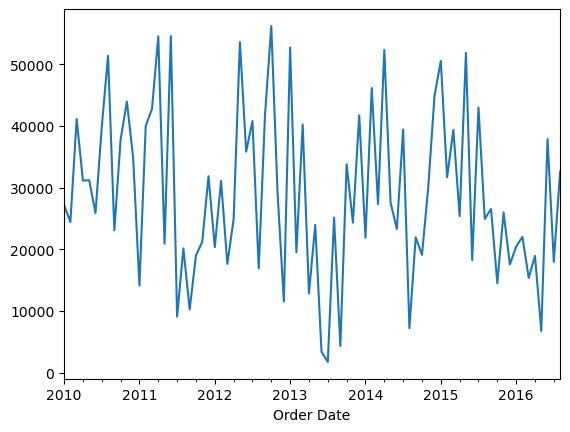

In [54]:
train.plot()

<Axes: >

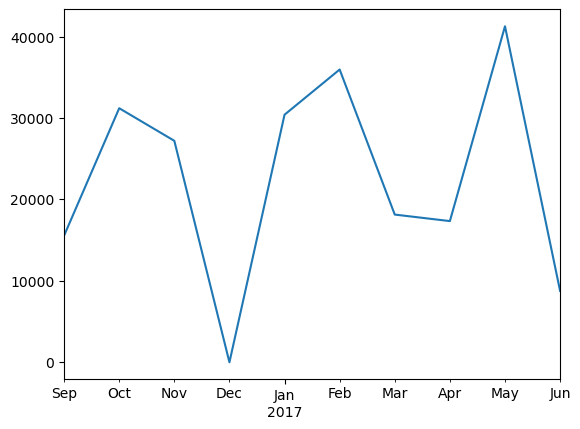

In [55]:
test.plot()

<Axes: >

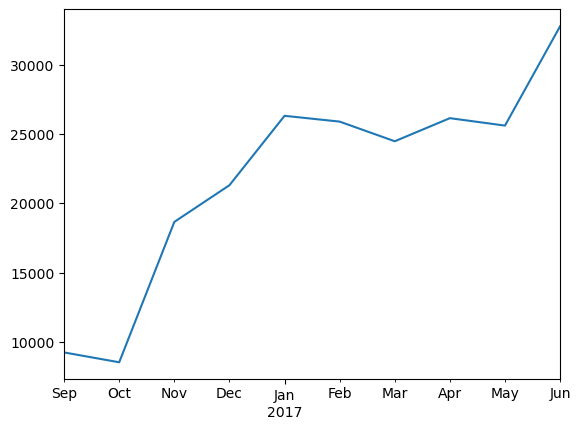

In [56]:

pred1.plot()

<Axes: >

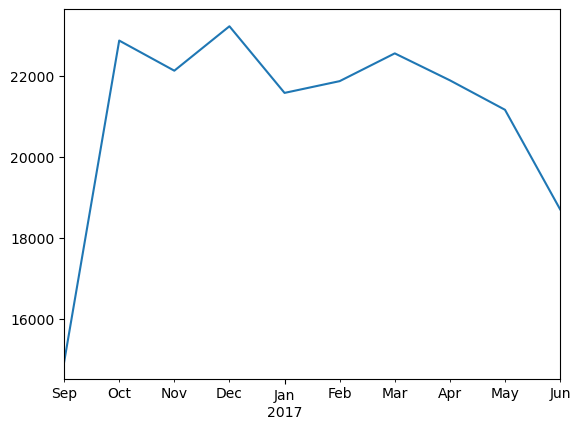

In [57]:
pred2.plot()

<Axes: >

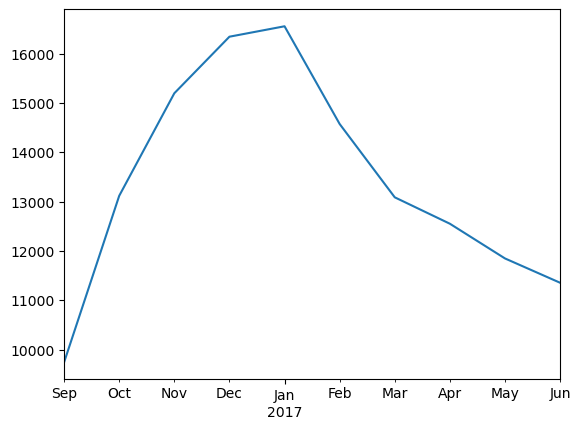

In [58]:

pred3.plot()

<Axes: >

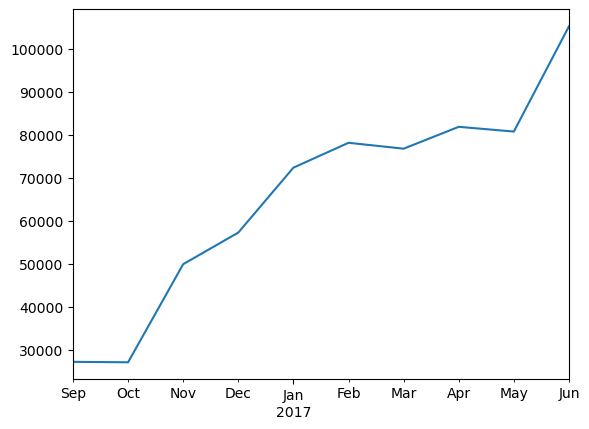

In [59]:
pred4.plot()

<Axes: >

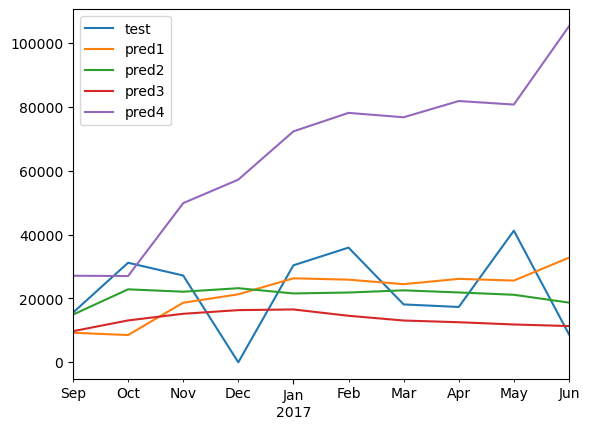

In [60]:
plt.plot(figsize=(12,48))
test.plot(label="test", legend=True)
pred1.plot(label="pred1", legend=True)
pred2.plot(label="pred2", legend=True)
pred3.plot(label="pred3", legend=True)
pred4.plot(label="pred4", legend=True)